#setup

In [1]:
import numpy as np
import random
import pandas as pd
import os
from glob import glob
import torch
from PIL import Image
from torch import nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from zipfile import ZipFile
from sklearn.model_selection import StratifiedKFold
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer
from torch.utils.data import DataLoader, Dataset
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from sklearn.metrics import classification_report
import shutil
import seaborn as sns

In [2]:
# !pip install torchvision==0.12.0

In [3]:
import torchvision
from torchvision import transforms, models

In [4]:
!pip install torchmetrics
import torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 409 kB 7.3 MB/s 


In [5]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null 
import albumentations as A
from albumentations.pytorch import ToTensorV2

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ain2h5__


In [6]:
!pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.6 MB/s 
     |████████████████████████████████| 181 kB 64.1 MB/s 
     |████████████████████████████████| 145 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8dea7279e358399e93a5579cc7431400f5f370cf4132fa814a3fa3ed3b2414be
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [7]:
!wandb login 61bddcacc47cfdaa9b6674b73cc7d8589419a857

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


"Cannot add the same path twice: debug.log" wandb

In [9]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 8.3 MB/s 


In [10]:
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [11]:
%cd /gdrive/MyDrive/Final_Project/repo/final_project/pytorch-grad-cam/
!pip install .

/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/pytorch-grad-cam
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/pytorch-grad-cam
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25777 sha256=559477acfbd87d727c7019834e783d4cf9ad611bdc9d433

In [12]:
%cd /gdrive/MyDrive/Final_Project/repo/final_project/Data-app
!pip install -r requirements.txt

/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/Data-app
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.6 MB/s 
     |████████████████████████████████| 137.3 MB 16 kB/s 
     |████████████████████████████████| 2.2 MB 44.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 454 kB 47.2 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 7.5 MB 35.0 MB/s 
     |████████████████████████████████| 459 kB 50.7 MB/s 
     |████████████████████████████████| 2.9 MB 39.6 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 
     |████████████████████████████████| 4.0 MB 50.6 MB/s 
     |████████████████████████████████| 111 kB 64.2 MB/s 
     |████████████████████████████████| 4.3 MB 27.6 MB/s 
     |████████████████████████████████| 164

#exp1

##exp_setup

In [ ]:
def get_transform(phase: str):
    if phase == 'train':
        return A.Compose([
            A.RandomResizedCrop(height=224, width=224),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.OneOf([
            A.RandomBrightnessContrast(p=0.5),A.RandomGamma(p=0.5)], p=0.5),
            A.OneOf([
            A.Blur(p=0.4),
            A.GaussianBlur(p=0.4),
            A.MotionBlur(p=0.4)], p=0.4),
            A.OneOf([
            A.GaussNoise(p=0.4),
            A.ISONoise(p=0.4),
            A.GridDropout(ratio=0.5, p=0.2),
            A.CoarseDropout(max_holes=16, min_holes=8, max_height=16, max_width=16, min_height=8, min_width=8, p=0.2)], p=0.2),
            A.Normalize(),
            ToTensorV2(),
        ])
    else:
        return A.Compose([
            A.Resize(height=224, width=224),
            A.Normalize(),
            ToTensorV2(),
        ])

dict1 = {'Septoria': torch.tensor([1,0,0,0,0,0,0], dtype=torch.float32),
         'Powdery Mildew': torch.tensor([0,1,0,0,0,0,0], dtype=torch.float32),
         'Healthy': torch.tensor([0,0,1,0,0,0,0], dtype=torch.float32),
         'Tobacco Mosiac Virus': torch.tensor([0,0,0,1,0,0,0], dtype=torch.float32),
         'Spider Mites': torch.tensor([0,0,0,0,1,0,0], dtype=torch.float32),
         'Calcium Deficiency': torch.tensor([0,0,0,0,0,1,0], dtype=torch.float32),
         'Magnesium Deficiency': torch.tensor([0,0,0,0,0,0,1], dtype=torch.float32)}
dict2 = {0:'Septoria',
         1:'Powdery Mildew',
         2:'Healthy',
         3:'Tobacco Mosiac Virus',
         4:'Spider Mites',
         5:'Calcium Deficiency',
         6:'Magnesium Deficiency'}
class PlantDataset(Dataset):
    def __init__(self, df, transform=None, kind='train'):
        self.transform = transform
        self.kind = kind
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]["image_path"]
        label = self.df.iloc[idx]["label"]
        label = dict1[label]
        label_num = torch.argmax(label)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)["image"]
        return image, label, label_num
df_train = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/train.csv")
df_valid = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/val.csv")
train_dataset = PlantDataset(df_train, get_transform('train'))
valid_dataset = PlantDataset(df_valid, get_transform('valid'))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=4)

In [ ]:
%cd /gdrive/MyDrive/Final_Project/repo/final_project/pytorch-grad-cam/

/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/pytorch-grad-cam
Processing /gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/pytorch-grad-cam
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25777 sha256=5d3b3406c5e7cd51adfeb1ec1e89f71549a8edc5952425cfe8427bd5a06e4533
  Stored in directory: /root/.cache/pip/wheels/77/c2/19/72df755c98c09c34ff3088871

##exp

In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
                                      height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

model = torch.load("/gdrive/MyDrive/Final_Project/repo/checkpoints/vit_b_16_epoch76_f1=77.41000066794881")
model = model.eval()
target_layers = [model.encoder.layers.encoder_layer_11.ln_1]
# model = model2
# model = model.eval()
# target_layers = [model.blocks[-1].norm1]

# model = torch.load("/gdrive/MyDrive/Final_Project/Project_Code/model_checkpointsresnet50_epoch29")
# model = model.eval()
# target_layers = [model.layer4[-1]]

idx = 172
input_tensor = valid_dataset[idx][0].unsqueeze(0)
label = valid_dataset.df.iloc[idx]["label"]
image_path = valid_dataset.df.iloc[idx]["image_path"]
rgb_img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True, reshape_transform=reshape_transform)
# cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
targets = [ClassifierOutputTarget(None)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.

grayscale_cam = cam(input_tensor=input_tensor, targets=None)

out = model(input_tensor.to('cuda'))

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
rgb_img = cv2.resize(rgb_img, (224, 224))
visualization = show_cam_on_image(rgb_img.astype(np.float32)/255, grayscale_cam, use_rgb=True)

print("model predicted: " + str(dict2[out.argmax().tolist()]) + ", true label is: " + label)

model predicted: Powdery Mildew, true label is: Powdery Mildew


In [ ]:
grayscale_cam.shape

(224, 224)

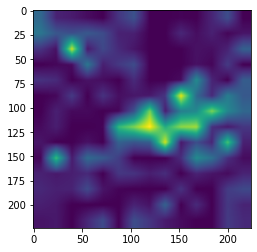

In [ ]:
plt.imshow(grayscale_cam)

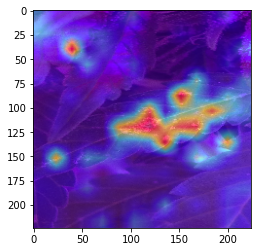

In [ ]:
plt.imshow(visualization)

In [ ]:
pred_map = grayscale_cam > 0.55
contours = cv2.findContours(pred_map.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
rect_image = cv2.drawContours(rgb_img, contours, -1, (255,0,0),3)

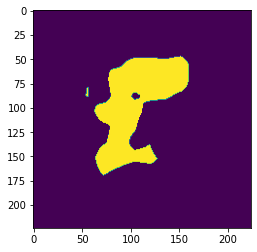

In [ ]:
plt.imshow(pred_map.astype(np.uint8))

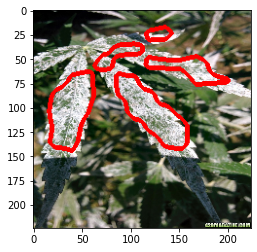

In [ ]:
plt.imshow(rect_image)

##exp stream-lit

In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/confusion_mat.py --tta

Conf Mat: 100% 286/286 [00:44<00:00,  6.49it/s]


In [ ]:
!sudo nano /etc/nginx/nginx.conf

sudo: nano: command not found


In [ ]:
!npm config set max_body_size 100 -g

In [ ]:
!pip install ttach

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-27 13:16:37.610 INFO    numexpr.utils: NumExpr defaulting to 4 threads.
npx: installed 22 in 2.06s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.82.153.237:8501

your url is: https://seven-kings-stop-34-82-153-237.loca.lt
/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/Data-app/img_classifier.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilitis = ms(output)
/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/Data-app/img_classifier.py:69: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



##train_exp

In [ ]:
%cd /gdrive/MyDrive/Final_Project/repo/final_project

/gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project


In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/create_data_csv.py --images_dir /gdrive/MyDrive/Final_Project/Project_Code/image_copy4 --save_dir /gdrive/MyDrive/Final_Project/repo/final_project

In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/split_data.py --csv_file /gdrive/MyDrive/Final_Project/repo/final_project/train.csv --save_dir /gdrive/MyDrive/Final_Project/repo

train size: 1144
valid size: 286


In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/train.py --train_csv /gdrive/MyDrive/Final_Project/repo/train.csv --val_csv /gdrive/MyDrive/Final_Project/repo/val.csv --batch_size 16 --num_workers 16 --num_epochs 200 --save_dir /gdrive/MyDrive/Final_Project/repo/checkpoints --model_name vit_b_16

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100% 330M/330M [00:07<00:00, 45.4MB/s]
wandb: Currently logged in as: bary (seminar). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in /gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/wandb/run-20220506_221054-fit17qlv
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run vit_b_16_batch=16
wandb: ⭐️ View project at https://wandb.ai/seminar/Final_Project
wandb: 🚀 View run at https://wandb.ai/seminar/Final_Project/runs/fit17qlv
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excess

#data pipe

In [ ]:
image_paths = []
labels = []
image_id = []
for dir in glob('/gdrive/MyDrive/Final_Project/Project_Code/image_copy4/*'):
  label = dir.split('/')[-1]
  for path in glob(dir +'/*'):
    image_paths.append(path)
    labels.append(label)
    image_id.append(path.split("/")[-1].split(".")[0])

In [ ]:
dict_ = {"image_path":image_paths, "image_id":image_id, "label":labels}

In [ ]:
df = pd.DataFrame(data=dict_)

In [ ]:
df

,image_path,image_id,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD58,Calcium Deficiency
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD54,Calcium Deficiency
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD22,Calcium Deficiency
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD61,Calcium Deficiency
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD24,Calcium Deficiency
...,...,...,...
1425,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_1,Tobacco Mosiac Virus
1426,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_2,Tobacco Mosiac Virus
1427,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_3,Tobacco Mosiac Virus
1428,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1022_1,Tobacco Mosiac Virus


In [ ]:
source = df['label'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

In [ ]:
len(df)

1430

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



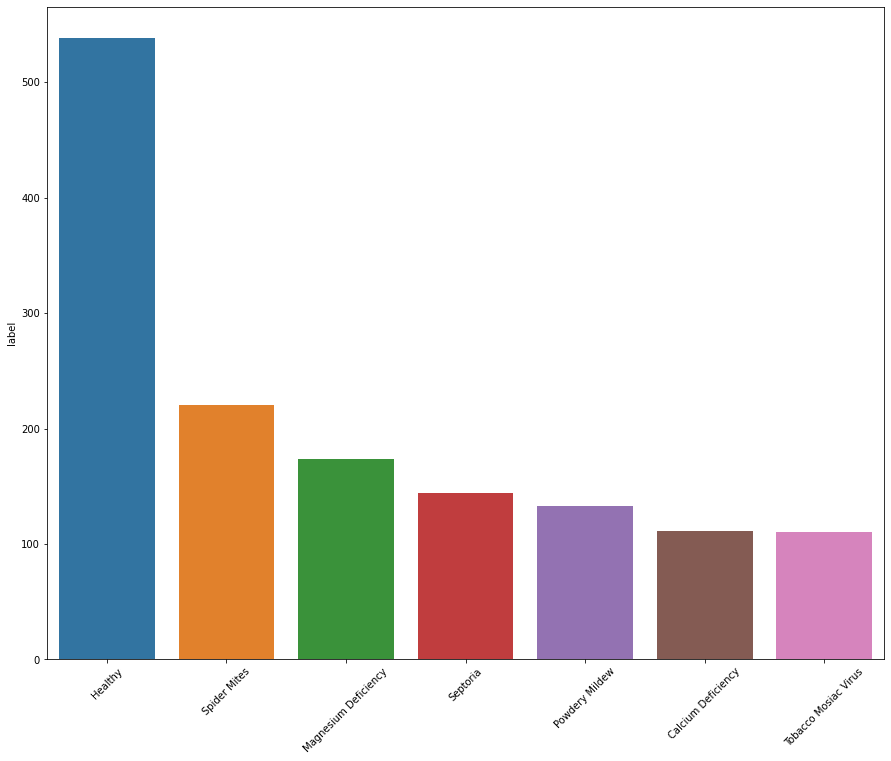

In [ ]:
plt.figure(figsize=(15,12))
labels = sns.barplot(df.label.value_counts().index,df.label.value_counts())
for item in labels.get_xticklabels():
    item.set_rotation(45)

In [ ]:
df

,image_path,image_id,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD58,Calcium Deficiency
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD54,Calcium Deficiency
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD22,Calcium Deficiency
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD61,Calcium Deficiency
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD24,Calcium Deficiency
...,...,...,...
1425,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_1,Tobacco Mosiac Virus
1426,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_2,Tobacco Mosiac Virus
1427,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_3,Tobacco Mosiac Virus
1428,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1022_1,Tobacco Mosiac Virus


In [ ]:
sfk = StratifiedKFold(5)
for train_idx, valid_idx in sfk.split(df.index, df['label']):
    df_train = df.iloc[train_idx]
    df_valid = df.iloc[valid_idx]
    break
print(f"train size: {len(df_train)}")
print(f"valid size: {len(df_valid)}")

train size: 1144
valid size: 286


In [ ]:
source = df_train['label'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

In [ ]:
source = df_valid['label'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Label distribution')
fig.show()

In [ ]:
def get_transform(phase: str):
    if phase == 'train':
        return A.Compose([
            A.RandomResizedCrop(height=224, width=224),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.OneOf([
            A.RandomBrightnessContrast(p=0.5),A.RandomGamma(p=0.5)], p=0.5),
            A.OneOf([
            A.Blur(p=0.4),
            A.GaussianBlur(p=0.4),
            A.MotionBlur(p=0.4)], p=0.4),
            A.OneOf([
            A.GaussNoise(p=0.4),
            A.ISONoise(p=0.4),
            A.GridDropout(ratio=0.5, p=0.2),
            A.CoarseDropout(max_holes=16, min_holes=8, max_height=16, max_width=16, min_height=8, min_width=8, p=0.2)], p=0.2),
            A.Normalize(),
            ToTensorV2(),
        ])
    else:
        return A.Compose([
            A.Resize(height=224, width=224),
            A.Normalize(),
            ToTensorV2(),
        ])

In [ ]:
dict1 = {'Septoria': torch.tensor([1,0,0,0,0,0,0], dtype=torch.float32),
         'Powdery Mildew': torch.tensor([0,1,0,0,0,0,0], dtype=torch.float32),
         'Healthy': torch.tensor([0,0,1,0,0,0,0], dtype=torch.float32),
         'Tobacco Mosiac Virus': torch.tensor([0,0,0,1,0,0,0], dtype=torch.float32),
         'Spider Mites': torch.tensor([0,0,0,0,1,0,0], dtype=torch.float32),
         'Calcium Deficiency': torch.tensor([0,0,0,0,0,1,0], dtype=torch.float32),
         'Magnesium Deficiency': torch.tensor([0,0,0,0,0,0,1], dtype=torch.float32)}
class PlantDataset(Dataset):
    def __init__(self, df, transform=None, kind='train'):
        self.transform = transform
        self.kind = kind
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]["image_path"]
        label = self.df.iloc[idx]["label"]
        label = dict1[label]
        label_num = torch.argmax(label)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)["image"]
        return image, label, label_num

# training

In [ ]:
def to_numpy(tensor):
    """Auxiliary function to convert tensors into numpy arrays
    """
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) # only difference

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def train_epoch(dataloader, model, criterion, optimizer, epoch):
    m = nn.Sigmoid()
    accuracy = AverageMeter()
    acc_cls1 = AverageMeter()
    acc_cls2 = AverageMeter()
    acc_cls3 = AverageMeter()
    acc_cls4 = AverageMeter()
    acc_cls5 = AverageMeter()
    acc_cls6 = AverageMeter()
    acc_cls7 = AverageMeter()    
    acc_list = [acc_cls1,
                acc_cls2,
                acc_cls3,
                acc_cls4,
                acc_cls5,
                acc_cls6,
                acc_cls7]
    losses = AverageMeter()
    model.train()
    all_pred = []
    all_target = []
    for i, (img, target, target_num) in tqdm(enumerate(dataloader), total=len(dataloader), desc="Train"):
        img = img.float()    

        img = img.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(img)
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = m(output)
        
        acc = torchmetrics.functional.accuracy(pred, target.int())
        accuracy_per_class = torchmetrics.functional.accuracy(pred, target.int(), average = 'none', num_classes = 7)
        target_num_unique, target_num_count = torch.unique(target_num.int(), return_counts = True)

        for i,j in zip(target_num_unique, target_num_count):
            acc_list[i.int()].update(accuracy_per_class[i.int()], j.int())

        losses.update(loss.item(), img.size(0))
        accuracy.update(acc, img.size(0))

        target = torch.argmax(target, dim=1).tolist()
        pred = torch.argmax(pred, dim=1).tolist()
        
        all_target += target
        all_pred += pred
        
        torch.cuda.empty_cache()
    
    cr = classification_report(all_target, all_pred, output_dict=True)

    wandb.log({"train loss": losses.avg, "train acc": accuracy.avg*100,
               "train precison": cr['macro avg']['precision']*100, "train recall": cr['macro avg']['recall']*100,
               "train f1": cr['macro avg']['f1-score']*100, "train precison cls1": cr['0']['precision']*100, "train recall cls1": cr['0']['recall']*100,
               "train f1 cls1": cr['0']['f1-score']*100, "train precison cls2": cr['1']['precision']*100, "train recall cls2": cr['1']['recall']*100,
               "train f1 cls2": cr['1']['f1-score']*100, "train precison cls3": cr['2']['precision']*100, "train recall cls3": cr['2']['recall']*100,
               "train f1 cls3": cr['2']['f1-score']*100, "train precison cls4": cr['3']['precision']*100, "train recall cls4": cr['3']['recall']*100,
               "train f1 cls4": cr['3']['f1-score']*100, "train precison cls5": cr['4']['precision']*100, "train recall cls5": cr['4']['recall']*100,
               "train f1 cls5": cr['4']['f1-score']*100, "train precison cls6": cr['5']['precision']*100, "train recall cls6": cr['5']['recall']*100,
               "train f1 cls6": cr['5']['f1-score']*100, "train precison cls7": cr['6']['precision']*100, "train recall cls7": cr['6']['recall']*100,
               "train f1 cls7": cr['6']['f1-score']*100,
               "train acc cls1": acc_cls1.avg*100,
              "train acc cls2": acc_cls2.avg*100, "train acc cls3": acc_cls3.avg*100,
              "train acc cls4": acc_cls4.avg*100, "train acc cls5": acc_cls5.avg*100,
               "train acc cls6": acc_cls6.avg*100, "train acc cls7": acc_cls7.avg*100}, step = epoch)

In [ ]:
def validate_epoch(dataloader, model, criterion, optimizer, epoch):
    m = nn.Sigmoid()
    acc = AverageMeter()
    acc_cls1 = AverageMeter()
    acc_cls2 = AverageMeter()
    acc_cls3 = AverageMeter()
    acc_cls4 = AverageMeter()
    acc_cls5 = AverageMeter()
    acc_cls6 = AverageMeter()
    acc_cls7 = AverageMeter()
    acc_list = [acc_cls1,
                acc_cls2,
                acc_cls3,
                acc_cls4,
                acc_cls5,
                acc_cls6,
                acc_cls7]
    losses = AverageMeter()
    all_pred = []
    all_target = []
    model.eval()
    loss_accumlated = 0
    with torch.no_grad():
      for i, (img, target, target_num) in tqdm(enumerate(dataloader), total=len(dataloader), desc="Val"):
          
          img = img.float()
          img = img.to(device)
          target = target.to(device)
          target_num = target_num.to(device)
          
          optimizer.zero_grad() 
          
          output = model(img) 
          
          loss = criterion(output,target)
          losses.update(loss.item(), img.size(0))
          loss_accumlated += loss.item()
                  
          pred = m(output)
                  
          accuracy = torchmetrics.functional.accuracy(pred,  target.int())
          accuracy_per_class = torchmetrics.functional.accuracy(pred, target.int(), average = 'none', num_classes = 7)
          acc.update(accuracy, img.size(0))
          
          target_num_unique, target_num_count = torch.unique(target_num.int(), return_counts = True)

          for i,j in zip(target_num_unique, target_num_count):
              acc_list[i.int()].update(accuracy_per_class[i.int()], j.int())
          

          target = torch.argmax(target, dim=1).tolist()
          pred = torch.argmax(pred, dim=1).tolist()
          
          all_target += target
          all_pred += pred

          torch.cuda.empty_cache()

    cr = classification_report(all_target, all_pred, output_dict=True)
    wandb.log({"val loss": losses.avg, "val acc": acc.avg*100,
               "val precison": cr['macro avg']['precision']*100, "val recall": cr['macro avg']['recall']*100,
               "val f1": cr['macro avg']['f1-score']*100, "val precison cls1": cr['0']['precision']*100, "val recall cls1": cr['0']['recall']*100,
               "val f1 cls1": cr['0']['f1-score']*100, "val precison cls2": cr['1']['precision']*100, "val recall cls2": cr['1']['recall']*100,
               "val f1 cls2": cr['1']['f1-score']*100, "val precison cls3": cr['2']['precision']*100, "val recall cls3": cr['2']['recall']*100,
               "val f1 cls3": cr['2']['f1-score']*100, "val precison cls4": cr['3']['precision']*100, "val recall cls4": cr['3']['recall']*100,
               "val f1 cls4": cr['3']['f1-score']*100, "val precison cls5": cr['4']['precision']*100, "val recall cls5": cr['4']['recall']*100,
               "val f1 cls5": cr['4']['f1-score']*100, "val precison cls6": cr['5']['precision']*100, "val recall cls6": cr['5']['recall']*100,
               "val f1 cls6": cr['5']['f1-score']*100, "val precison cls7": cr['6']['precision']*100, "val recall cls7": cr['6']['recall']*100,
               "val f1 cls7": cr['6']['f1-score']*100,
              "val acc cls1": acc_cls1.avg*100,
              "val acc cls2": acc_cls2.avg*100, "val acc cls3": acc_cls3.avg*100,
              "val acc cls4": acc_cls4.avg*100, "val acc cls5": acc_cls5.avg*100,
              "val acc cls6": acc_cls6.avg*100, "val acc cls7": acc_cls7.avg*100}, step = epoch)
    print(classification_report(all_target, all_pred))
    return cr['macro avg']['f1-score']*100

In [ ]:
def train(loader_train, loader_val, EPOCHS, model, opt, criterion, model_path, model_name):
    best_acc = 0
    for e in range(EPOCHS):
        print("------------------------epoch " + str(e) + "-----------------------------")
        train_epoch(loader_train, model, criterion, opt, e)
        current_acc = validate_epoch(loader_val, model, criterion, opt, e)
        if best_acc < current_acc:
            best_acc = current_acc
            model_name = model_name + "_epoch" + str(e)
            torch.save(model, model_path + '/' + model_name)

In [ ]:
model = torch.load('/gdrive/MyDrive/Final_Project/Project_Code/model_resnet50')
# model = models.resnet152(pretrained = True)
# model = models.convnext_base(pretrained=True)
# in_features = model.classifier[2].in_features
# model.classifier[2] = torch.nn.Linear(in_features, 7)
in_features = model.fc.in_features
model.fc = torch.nn.Linear(in_features, 7)

model = model.cuda()
criterion = nn.BCEWithLogitsLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.0001)

In [ ]:
project_name = "Final_Project"
entity_name = "seminar"
wab = wandb.init(project=project_name, entity=entity_name)

wandb: Currently logged in as: seminar (use `wandb login --relogin` to force relogin)


In [ ]:
df_train = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/train.csv")
df_valid = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/val.csv")
train_dataset = PlantDataset(df_train, get_transform('train'))
valid_dataset = PlantDataset(df_valid, get_transform('valid'))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=4)

In [ ]:
it = iter(valid_dataset)

In [ ]:
next(it)[0].unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [ ]:
for i in valid_dataset:
  print(i)

(tensor([[[ 0.4851,  0.7762,  1.2557,  ..., -0.6281, -0.7137, -0.8507],
         [ 0.5022,  0.7591,  0.9817,  ..., -0.6965, -0.8507, -0.9363],
         [ 0.7762,  0.8276,  0.7762,  ..., -0.8335, -0.8507, -0.9363],
         ...,
         [-0.6965, -0.7137, -0.7137,  ...,  0.1597,  0.3823,  0.5536],
         [-0.6794, -0.6281, -0.6965,  ...,  0.2453,  0.6563,  0.5536],
         [-0.7650, -0.8164, -0.7479,  ...,  0.8447,  0.4679,  0.4166]],

        [[ 1.0105,  1.2906,  1.7458,  ..., -0.9678, -1.0553, -1.1954],
         [ 1.0105,  1.2556,  1.4657,  ..., -1.0378, -1.1779, -1.2829],
         [ 1.3081,  1.3256,  1.2556,  ..., -1.1779, -1.1954, -1.2829],
         ...,
         [-0.9853, -1.0203, -1.0028,  ...,  0.5028,  0.8004,  0.8880],
         [-0.9678, -0.9153, -0.9853,  ...,  0.4328,  1.0105,  0.8880],
         [-1.0553, -1.1078, -1.0378,  ...,  0.7479,  0.6604,  0.7654]],

        [[ 0.6356,  0.8274,  1.1585,  ..., -0.5844, -0.6715, -0.8110],
         [ 0.6531,  0.8099,  0.8971,  ..., -

KeyboardInterrupt: ignored

In [ ]:
model_path = '/gdrive/MyDrive/Final_Project/Project_Code/model_checkpoints'
model_name = 'resnet50'
train(train_loader, valid_loader, 40, model, opt, criterion, model_path, model_name)
wab.finish()

------------------------epoch 0-----------------------------


Val: 100%|██████████| 18/18 [01:09<00:00,  3.85s/it]


              precision    recall  f1-score   support

           0       0.55      0.82      0.66        28
           1       0.37      0.56      0.44        27
           2       0.85      0.77      0.81       107
           3       1.00      0.18      0.31        22
           4       0.44      0.45      0.45        44
           5       0.78      0.30      0.44        23
           6       0.55      0.77      0.64        35

    accuracy                           0.62       286
   macro avg       0.65      0.55      0.53       286
weighted avg       0.68      0.62      0.61       286

------------------------epoch 1-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.69it/s]


              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.60      0.56      0.58        27
           2       0.82      0.86      0.84       107
           3       0.67      0.27      0.39        22
           4       0.51      0.59      0.55        44
           5       0.65      0.57      0.60        23
           6       0.53      0.71      0.61        35

    accuracy                           0.68       286
   macro avg       0.65      0.60      0.61       286
weighted avg       0.69      0.68      0.67       286

------------------------epoch 2-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.74it/s]


              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.76      0.48      0.59        27
           2       0.89      0.79      0.84       107
           3       0.50      0.45      0.48        22
           4       0.57      0.68      0.62        44
           5       0.75      0.52      0.62        23
           6       0.41      0.66      0.51        35

    accuracy                           0.68       286
   macro avg       0.66      0.63      0.63       286
weighted avg       0.72      0.68      0.69       286

------------------------epoch 3-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]


              precision    recall  f1-score   support

           0       0.50      0.68      0.58        28
           1       0.89      0.63      0.74        27
           2       0.87      0.81      0.84       107
           3       0.80      0.36      0.50        22
           4       0.65      0.80      0.71        44
           5       0.65      0.57      0.60        23
           6       0.47      0.60      0.52        35

    accuracy                           0.70       286
   macro avg       0.69      0.64      0.64       286
weighted avg       0.73      0.70      0.70       286

------------------------epoch 4-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]


              precision    recall  f1-score   support

           0       0.53      0.71      0.61        28
           1       0.80      0.74      0.77        27
           2       0.83      0.89      0.86       107
           3       0.64      0.73      0.68        22
           4       0.69      0.70      0.70        44
           5       0.71      0.52      0.60        23
           6       0.64      0.40      0.49        35

    accuracy                           0.73       286
   macro avg       0.69      0.67      0.67       286
weighted avg       0.73      0.73      0.72       286

------------------------epoch 5-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.46      0.43      0.44        28
           1       0.77      0.74      0.75        27
           2       0.94      0.81      0.87       107
           3       0.60      0.68      0.64        22
           4       0.46      0.80      0.58        44
           5       0.58      0.30      0.40        23
           6       0.75      0.60      0.67        35

    accuracy                           0.69       286
   macro avg       0.65      0.62      0.62       286
weighted avg       0.72      0.69      0.69       286

------------------------epoch 6-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.58it/s]


              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.87      0.74      0.80        27
           2       0.93      0.82      0.87       107
           3       0.79      0.50      0.61        22
           4       0.59      0.75      0.66        44
           5       0.74      0.74      0.74        23
           6       0.54      0.71      0.62        35

    accuracy                           0.74       286
   macro avg       0.73      0.71      0.71       286
weighted avg       0.77      0.74      0.75       286

------------------------epoch 7-----------------------------


Val: 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        28
           1       0.83      0.56      0.67        27
           2       0.87      0.87      0.87       107
           3       1.00      0.55      0.71        22
           4       0.58      0.75      0.65        44
           5       0.68      0.74      0.71        23
           6       0.63      0.77      0.69        35

    accuracy                           0.74       286
   macro avg       0.75      0.69      0.70       286
weighted avg       0.77      0.74      0.74       286

------------------------epoch 8-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        28
           1       0.94      0.63      0.76        27
           2       0.89      0.80      0.84       107
           3       0.83      0.45      0.59        22
           4       0.71      0.73      0.72        44
           5       0.55      0.74      0.63        23
           6       0.53      0.83      0.64        35

    accuracy                           0.72       286
   macro avg       0.72      0.68      0.68       286
weighted avg       0.76      0.72      0.73       286

------------------------epoch 9-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.62it/s]

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       1.00      0.63      0.77        27
           2       0.78      0.90      0.83       107
           3       0.69      0.50      0.58        22
           4       0.78      0.70      0.74        44
           5       0.65      0.74      0.69        23
           6       0.55      0.63      0.59        35

    accuracy                           0.74       286
   macro avg       0.74      0.68      0.70       286
weighted avg       0.75      0.74      0.74       286

------------------------epoch 10-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.57it/s]

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.75      0.67      0.71        27
           2       0.90      0.79      0.85       107
           3       0.78      0.64      0.70        22
           4       0.64      0.61      0.63        44
           5       0.58      0.61      0.60        23
           6       0.47      0.74      0.58        35

    accuracy                           0.71       286
   macro avg       0.68      0.67      0.67       286
weighted avg       0.73      0.71      0.71       286

------------------------epoch 11-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]


              precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.90      0.67      0.77        27
           2       0.85      0.89      0.87       107
           3       0.67      0.73      0.70        22
           4       0.69      0.75      0.72        44
           5       0.69      0.78      0.73        23
           6       0.68      0.66      0.67        35

    accuracy                           0.77       286
   macro avg       0.74      0.72      0.73       286
weighted avg       0.77      0.77      0.76       286

------------------------epoch 12-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]


              precision    recall  f1-score   support

           0       0.67      0.86      0.75        28
           1       0.94      0.59      0.73        27
           2       0.81      0.94      0.87       107
           3       0.76      0.59      0.67        22
           4       0.86      0.68      0.76        44
           5       0.80      0.70      0.74        23
           6       0.65      0.69      0.67        35

    accuracy                           0.78       286
   macro avg       0.78      0.72      0.74       286
weighted avg       0.79      0.78      0.78       286

------------------------epoch 13-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]

              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       1.00      0.48      0.65        27
           2       0.87      0.97      0.92       107
           3       0.71      0.77      0.74        22
           4       0.70      0.73      0.71        44
           5       0.61      0.83      0.70        23
           6       0.79      0.63      0.70        35

    accuracy                           0.78       286
   macro avg       0.77      0.72      0.72       286
weighted avg       0.79      0.78      0.78       286

------------------------epoch 14-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        28
           1       0.79      0.85      0.82        27
           2       0.91      0.79      0.85       107
           3       0.75      0.55      0.63        22
           4       0.79      0.68      0.73        44
           5       0.70      0.83      0.76        23
           6       0.52      0.83      0.64        35

    accuracy                           0.76       286
   macro avg       0.73      0.74      0.73       286
weighted avg       0.78      0.76      0.76       286

------------------------epoch 15-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]


              precision    recall  f1-score   support

           0       0.63      0.86      0.73        28
           1       0.81      0.78      0.79        27
           2       0.89      0.87      0.88       107
           3       0.70      0.64      0.67        22
           4       0.88      0.64      0.74        44
           5       0.78      0.78      0.78        23
           6       0.56      0.69      0.62        35

    accuracy                           0.78       286
   macro avg       0.75      0.75      0.74       286
weighted avg       0.79      0.78      0.78       286

------------------------epoch 16-----------------------------


Val: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.83      0.74      0.78        27
           2       0.89      0.85      0.87       107
           3       0.51      0.82      0.63        22
           4       0.69      0.70      0.70        44
           5       0.67      0.78      0.72        23
           6       0.70      0.54      0.61        35

    accuracy                           0.76       286
   macro avg       0.72      0.74      0.72       286
weighted avg       0.77      0.76      0.76       286

------------------------epoch 17-----------------------------



Val: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.88      0.81      0.85        27
           2       0.88      0.72      0.79       107
           3       0.68      0.59      0.63        22
           4       0.65      0.80      0.71        44
           5       0.75      0.78      0.77        23
           6       0.49      0.63      0.55        35

    accuracy                           0.73       286
   macro avg       0.72      0.74      0.73       286
weighted avg       0.76      0.73      0.74       286

------------------------epoch 18-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        28
           1       0.84      0.78      0.81        27
           2       0.87      0.88      0.87       107
           3       0.72      0.59      0.65        22
           4       0.80      0.64      0.71        44
           5       0.66      0.83      0.73        23
           6       0.53      0.69      0.60        35

    accuracy                           0.76       286
   macro avg       0.72      0.71      0.71       286
weighted avg       0.77      0.76      0.76       286

------------------------epoch 19-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.61it/s]


              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.88      0.81      0.85        27
           2       0.93      0.81      0.87       107
           3       0.60      0.82      0.69        22
           4       0.74      0.84      0.79        44
           5       0.68      0.65      0.67        23
           6       0.69      0.71      0.70        35

    accuracy                           0.78       286
   macro avg       0.74      0.76      0.75       286
weighted avg       0.79      0.78      0.78       286

------------------------epoch 20-----------------------------


Val: 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.91      0.78      0.84        27
           2       0.93      0.74      0.82       107
           3       0.59      0.77      0.67        22
           4       0.81      0.80      0.80        44
           5       0.67      0.87      0.75        23
           6       0.51      0.69      0.59        35

    accuracy                           0.76       286
   macro avg       0.73      0.76      0.74       286
weighted avg       0.79      0.76      0.76       286

------------------------epoch 21-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        28
           1       0.85      0.63      0.72        27
           2       0.88      0.89      0.88       107
           3       0.76      0.73      0.74        22
           4       0.78      0.66      0.72        44
           5       0.70      0.70      0.70        23
           6       0.59      0.74      0.66        35

    accuracy                           0.77       286
   macro avg       0.74      0.73      0.73       286
weighted avg       0.78      0.77      0.77       286

------------------------epoch 22-----------------------------



Val: 100%|██████████| 18/18 [00:04<00:00,  4.43it/s]

              precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.92      0.41      0.56        27
           2       0.85      0.87      0.86       107
           3       0.87      0.59      0.70        22
           4       0.68      0.77      0.72        44
           5       0.62      0.78      0.69        23
           6       0.59      0.83      0.69        35

    accuracy                           0.75       286
   macro avg       0.75      0.69      0.70       286
weighted avg       0.77      0.75      0.74       286

------------------------epoch 23-----------------------------



Val: 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       1.00      0.52      0.68        27
           2       0.94      0.81      0.87       107
           3       0.89      0.73      0.80        22
           4       0.54      0.80      0.64        44
           5       0.76      0.57      0.65        23
           6       0.56      0.80      0.66        35

    accuracy                           0.74       286
   macro avg       0.76      0.70      0.71       286
weighted avg       0.79      0.74      0.75       286

------------------------epoch 24-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.71      0.81      0.76        27
           2       0.85      0.87      0.86       107
           3       0.71      0.68      0.70        22
           4       0.85      0.52      0.65        44
           5       0.67      0.70      0.68        23
           6       0.59      0.77      0.67        35

    accuracy                           0.75       286
   macro avg       0.73      0.72      0.71       286
weighted avg       0.76      0.75      0.75       286

------------------------epoch 25-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]

              precision    recall  f1-score   support

           0       0.53      0.68      0.59        28
           1       0.85      0.63      0.72        27
           2       0.95      0.79      0.86       107
           3       0.68      0.59      0.63        22
           4       0.56      0.84      0.67        44
           5       0.62      0.78      0.69        23
           6       0.79      0.63      0.70        35

    accuracy                           0.73       286
   macro avg       0.71      0.71      0.70       286
weighted avg       0.77      0.73      0.74       286

------------------------epoch 26-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.54it/s]

              precision    recall  f1-score   support

           0       0.62      0.82      0.71        28
           1       0.76      0.93      0.83        27
           2       0.92      0.84      0.88       107
           3       0.59      0.73      0.65        22
           4       0.70      0.68      0.69        44
           5       0.71      0.52      0.60        23
           6       0.71      0.63      0.67        35

    accuracy                           0.76       286
   macro avg       0.71      0.74      0.72       286
weighted avg       0.77      0.76      0.76       286

------------------------epoch 27-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.59it/s]


              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.95      0.74      0.83        27
           2       0.88      0.89      0.88       107
           3       0.71      0.45      0.56        22
           4       0.64      0.77      0.70        44
           5       0.64      0.70      0.67        23
           6       0.60      0.60      0.60        35

    accuracy                           0.75       286
   macro avg       0.72      0.69      0.70       286
weighted avg       0.76      0.75      0.75       286

------------------------epoch 28-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]


              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.85      0.85      0.85        27
           2       0.92      0.86      0.89       107
           3       0.79      0.68      0.73        22
           4       0.80      0.75      0.78        44
           5       0.55      0.78      0.64        23
           6       0.59      0.74      0.66        35

    accuracy                           0.78       286
   macro avg       0.75      0.75      0.75       286
weighted avg       0.80      0.78      0.79       286

------------------------epoch 29-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.86      0.70      0.78        27
           2       0.91      0.87      0.89       107
           3       0.81      0.77      0.79        22
           4       0.64      0.77      0.70        44
           5       0.69      0.78      0.73        23
           6       0.71      0.69      0.70        35

    accuracy                           0.79       286
   macro avg       0.77      0.77      0.77       286
weighted avg       0.80      0.79      0.80       286

------------------------epoch 30-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       1.00      0.78      0.88        27
           2       0.95      0.80      0.87       107
           3       0.74      0.64      0.68        22
           4       0.67      0.75      0.71        44
           5       0.62      0.78      0.69        23
           6       0.52      0.74      0.61        35

    accuracy                           0.76       286
   macro avg       0.75      0.74      0.74       286
weighted avg       0.79      0.76      0.77       286

------------------------epoch 31-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.73it/s]


              precision    recall  f1-score   support

           0       0.68      0.75      0.71        28
           1       0.95      0.67      0.78        27
           2       0.93      0.83      0.88       107
           3       0.68      0.77      0.72        22
           4       0.62      0.80      0.70        44
           5       0.70      0.83      0.76        23
           6       0.75      0.69      0.72        35

    accuracy                           0.78       286
   macro avg       0.76      0.76      0.75       286
weighted avg       0.80      0.78      0.78       286

------------------------epoch 32-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.67it/s]

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.85      0.81      0.83        27
           2       0.91      0.84      0.87       107
           3       0.78      0.64      0.70        22
           4       0.67      0.59      0.63        44
           5       0.63      0.74      0.68        23
           6       0.55      0.77      0.64        35

    accuracy                           0.76       286
   macro avg       0.73      0.73      0.72       286
weighted avg       0.77      0.76      0.76       286

------------------------epoch 33-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       1.00      0.56      0.71        27
           2       0.95      0.74      0.83       107
           3       0.78      0.64      0.70        22
           4       0.60      0.82      0.69        44
           5       0.59      0.74      0.65        23
           6       0.49      0.71      0.58        35

    accuracy                           0.72       286
   macro avg       0.73      0.71      0.70       286
weighted avg       0.78      0.72      0.73       286

------------------------epoch 34-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.60it/s]

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.85      0.63      0.72        27
           2       0.99      0.76      0.86       107
           3       0.74      0.77      0.76        22
           4       0.61      0.82      0.70        44
           5       0.62      0.78      0.69        23
           6       0.54      0.77      0.64        35

    accuracy                           0.74       286
   macro avg       0.73      0.73      0.72       286
weighted avg       0.79      0.74      0.75       286

------------------------epoch 35-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.67it/s]


              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.91      0.74      0.82        27
           2       0.90      0.86      0.88       107
           3       0.78      0.64      0.70        22
           4       0.72      0.75      0.73        44
           5       0.65      0.74      0.69        23
           6       0.57      0.66      0.61        35

    accuracy                           0.77       286
   macro avg       0.75      0.74      0.74       286
weighted avg       0.78      0.77      0.78       286

------------------------epoch 36-----------------------------


Val: 100%|██████████| 18/18 [00:03<00:00,  4.71it/s]

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       1.00      0.59      0.74        27
           2       0.90      0.78      0.83       107
           3       0.71      0.55      0.62        22
           4       0.51      0.86      0.64        44
           5       0.72      0.78      0.75        23
           6       0.57      0.66      0.61        35

    accuracy                           0.72       286
   macro avg       0.74      0.69      0.70       286
weighted avg       0.77      0.72      0.73       286

------------------------epoch 37-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.57it/s]

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.81      0.81      0.81        27
           2       0.87      0.80      0.83       107
           3       0.71      0.55      0.62        22
           4       0.61      0.75      0.67        44
           5       0.78      0.78      0.78        23
           6       0.69      0.69      0.69        35

    accuracy                           0.76       286
   macro avg       0.74      0.74      0.74       286
weighted avg       0.77      0.76      0.76       286

------------------------epoch 38-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

              precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       0.89      0.59      0.71        27
           2       0.93      0.87      0.90       107
           3       0.78      0.64      0.70        22
           4       0.56      0.77      0.65        44
           5       0.65      0.57      0.60        23
           6       0.67      0.69      0.68        35

    accuracy                           0.76       286
   macro avg       0.73      0.70      0.71       286
weighted avg       0.78      0.76      0.76       286

------------------------epoch 39-----------------------------



Val: 100%|██████████| 18/18 [00:03<00:00,  4.58it/s]


              precision    recall  f1-score   support

           0       0.67      0.86      0.75        28
           1       1.00      0.48      0.65        27
           2       0.95      0.82      0.88       107
           3       0.76      0.73      0.74        22
           4       0.55      0.91      0.68        44
           5       0.76      0.70      0.73        23
           6       0.72      0.60      0.66        35

    accuracy                           0.76       286
   macro avg       0.77      0.73      0.73       286
weighted avg       0.81      0.76      0.77       286




train acc,▁▃▃▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇█▇▇▇▇▇███████████
train acc cls1,▁▃▂▄▅▆▄▅▆▅▆▅▆▆▆▆▇▆▆▇▆▇▅█▇▆▇▆▇▇▇▇█▇██▇▇▇█
train acc cls2,▁▃▃▃▄▅▄▃▅▆▆▆▄▇▄▇▇▆▆▇▇▇▇▇▇▇█▆▇▆▇█▆▇▇█▇▇▇█
train acc cls3,▁▄▄▅▆▅▅▅▅▆▆▇▆▆▆▇▇▇▇▇▇██▇█▇▇▇▇██▇██▇██▇█▇
train acc cls4,▁▃▂▄▆▅▆▅▆▆▆▆▇▇▇▇▇▇█▇▆███▇▇██▇██▇███▇████
train acc cls5,▁▃▃▄▅▅▄▅▅▆▅▆▆▅▆▆▇▆▆▇▇▇▇▇▇▇▇▆▇▇▇▇▇▇██████
train acc cls6,▁▁▃▃▄▅▄▄▃▅▆▅▅▆▅▆▆▆▆▇▇▇▇▆▇▇▇▇██▇▇▇██▇▇▇█▇
train acc cls7,▁▁▂▂▅▃▄▄▄▄▅▅▆▆▆▅▅▇▇▆▆▇▆▆▆▇▆▇▇▇▇▇█▇█▇▇▇▇█
train f1,▁▃▄▅▆▆▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇███▇████████████
train f1 cls1,▁▃▃▄▄▅▃▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▆█▇▆▇▇▇▇█▇█▇███▇▇█
train f1 cls2,▁▄▅▅▅▆▅▅▆▇▇▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇▇█▇▇█▇▇████▇█


#create csv

In [ ]:
flowers_df = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/final_project/train.csv")

In [ ]:
val_data = pd.read_csv("/gdrive/MyDrive/Final_Project/repo/val.csv")

In [ ]:
import shutil

for i in val_data["image_path"].tolist():
  shutil.copy(i, "/gdrive/MyDrive/Final_Project/val_images/" + i.split("/")[-1])

In [ ]:
flowers_df = flowers_df.drop(columns="Unnamed: 0")

In [ ]:
flowers_df

,image_path,image_id,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD58,Calcium Deficiency
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD54,Calcium Deficiency
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD22,Calcium Deficiency
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD61,Calcium Deficiency
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,CD24,Calcium Deficiency
...,...,...,...
1425,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_1,Tobacco Mosiac Virus
1426,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_2,Tobacco Mosiac Virus
1427,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1021_3,Tobacco Mosiac Virus
1428,/gdrive/MyDrive/Final_Project/Project_Code/ima...,TMV1022_1,Tobacco Mosiac Virus


In [ ]:
flowers_df ['label'] = flowers_df.apply(lambda x: 1, axis=1)

In [ ]:
flowers_df = flowers_df.drop(columns="image_id")

In [ ]:
flowers_df

,image_path,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
...,...,...
1425,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1426,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1427,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1428,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1


In [ ]:
list_ = []
for path in glob("/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/*.jpg"):
  list_.append(path)

In [ ]:
from random import sample
sample_list = sample(list_, 1430)

In [ ]:
labels = []
for i in range(len(sample_list)):
    labels.append(0)

In [ ]:
len(labels)

1430

In [ ]:
dict_ = {"image_path":sample_list, "label":labels}

In [ ]:
non_leaf_df = pd.DataFrame(data=dict_)

In [ ]:
flowers_df.append(non_leaf_df)

,image_path,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
...,...,...
1425,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/3...,0
1426,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/1...,0
1427,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/2...,0
1428,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/1...,0


In [ ]:
conc_df = pd.concat([flowers_df, non_leaf_df])

In [ ]:
conc_df = conc_df.reset_index().drop(columns="index")

In [ ]:
conc_df

,image_path,label
0,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
1,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
2,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
3,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
4,/gdrive/MyDrive/Final_Project/Project_Code/ima...,1
...,...,...
2855,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/3...,0
2856,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/1...,0
2857,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/2...,0
2858,/gdrive/MyDrive/LeafGANDataSet/Data/non-leaf/1...,0


In [ ]:
conc_df.to_csv("/gdrive/MyDrive/Final_Project/repo/leaf_non-leaf.csv")

In [ ]:
sfk = StratifiedKFold(5)
for train_idx, valid_idx in sfk.split(conc_df.index, conc_df['label']):
    df_train = conc_df.iloc[train_idx]
    df_valid = conc_df.iloc[valid_idx]
    break
print(f"train size: {len(df_train)}")
print(f"valid size: {len(df_valid)}")

train size: 2288
valid size: 572


In [ ]:
df_train.to_csv("/gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_train.csv")
df_valid.to_csv("/gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_val.csv")

In [ ]:
df_train.iloc[0]["label"] == 1

True

In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/train_leaf_non-leaf.py --train_csv /gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_train.csv --val_csv /gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_val.csv --batch_size 16 --num_workers 4 --num_epochs 200 --save_dir /gdrive/MyDrive/Final_Project/repo/checkpoints --model_name resnet101 --optimizer adamw --weights /gdrive/MyDrive/LeafGANDataSet/LeafGAN/LFLSeg/trained_models/trained_resnet101_LFLSeg_v1_90.pth 

wandb: Currently logged in as: bary (seminar). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in /gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/Data-app/wandb/run-20220509_165951-ry1b8min
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run resnet101_batch=16_lr=0.0001
wandb: ⭐️ View project at https://wandb.ai/seminar/Final_Project
wandb: 🚀 View run at https://wandb.ai/seminar/Final_Project/runs/ry1b8min
------------------------epoch 0-----------------------------
Train:   0% 0/143 [00:05<?, ?it/s]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
0
Traceback (most recent call last):
  File "/gdrive/MyDrive/Final_Project/repo/final_project/train_leaf_non-leaf.py", line 193, in <module>
    main(weights, train_csv_path, val_csv_path, batch_size, num_workers, save_dir, num_epochs, model_name, lr, optimizer, weight_

In [ ]:
!python /gdrive/MyDrive/Final_Project/repo/final_project/train_leaf_non-leaf.py --train_csv /gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_train.csv --val_csv /gdrive/MyDrive/Final_Project/repo/leaf_non-leaf_val.csv --batch_size 16 --num_workers 16 --num_epochs 200 --save_dir /gdrive/MyDrive/Final_Project/repo/checkpoints --model_name resnet101 --optimizer adamw --weights /gdrive/MyDrive/LeafGANDataSet/LeafGAN/LFLSeg/trained_models/trained_resnet101_LFLSeg_v1_90.pth 

wandb: Currently logged in as: bary (seminar). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in /gdrive/.shortcut-targets-by-id/1s2yGQTYkVDMgUlK06Tg1jUX6Bkedccjo/Final_Project/repo/final_project/Data-app/wandb/run-20220508_190229-3p5eqs0r
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run resnet101_batch=16_lr=0.0001
wandb: ⭐️ View project at https://wandb.ai/seminar/Final_Project
wandb: 🚀 View run at https://wandb.ai/seminar/Final_Project/runs/3p5eqs0r
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_